In [4]:
im=rgb2gray(imread('/home/kmit/Downloads/images/lena_rgb.jpeg'))
# create the motion blur kernel
size = 21
kernel = np.zeros((size, size))
kernel[int((size-1)/2), :] = np.ones(size)
kernel = kernel / size
kernel = np.pad(kernel, (((im.shape[0]-size)//2,(im.shape[0]-size)//2), ((im.shape[1]-size)//2,(im.shape[1]-size)//2)), padwithzeros)
 
freq = fp.fft2(im)
freq_kernel1 = fp.fft2(fp.ifftshift(kernel))
convolved1 = freq*freq_kernel1
im_blur = fp.ifft2(convolved1).real
im_blur = im_blur / np.max(im_blur)

In [5]:
im.shape

(225, 225)

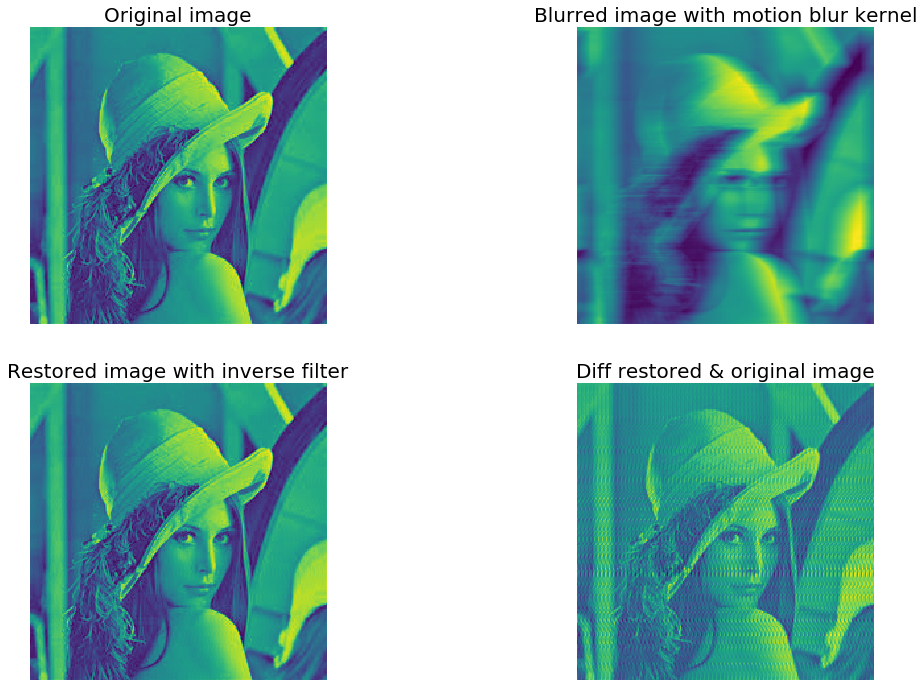

In [6]:

epsilon = 10**-6
 
freq = fp.fft2(im_blur)
freq_kernel = 1 / (epsilon + freq_kernel1)
 
convolved = freq*freq_kernel
im_restored = fp.ifft2(convolved).real
im_restored = im_restored / np.max(im_restored)
 
plt.figure(figsize=(18,12))
plt.subplot(221)
plt.imshow(im)
plt.title('Original image', size=20)
plt.axis('off')
plt.subplot(222)
plt.imshow(im_blur)
plt.title('Blurred image with motion blur kernel', size=20)
plt.axis('off')
plt.subplot(223)
plt.imshow(im_restored)
plt.title('Restored image with inverse filter', size=20)
plt.axis('off')
plt.subplot(224)
plt.imshow(im_restored - im)
plt.title('Diff restored & original image', size=20)
plt.axis('off')
plt.show()

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.color import rgb2gray
from skimage.io import imread
import scipy.fftpack as fp

In [2]:
import numpy as np
import numpy.fft as fp
import matplotlib.pyplot as plt

In [3]:
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector

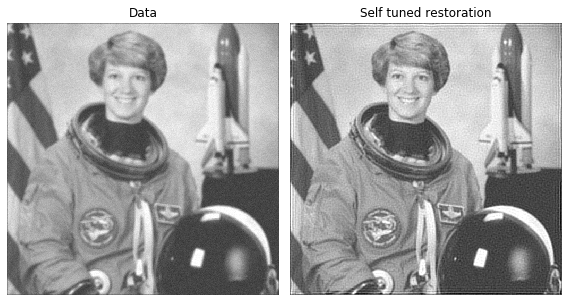

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

astro = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d as conv2
psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
astro += 0.1 * astro.std() * np.random.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(astro, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')
fig.tight_layout()

plt.show()

In [13]:
from skimage import color, data, restoration
img = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d
psf = np.ones((5, 5)) / 25
img = convolve2d(img, psf, 'same')
img += 0.1 * img.std() * np.random.standard_normal(img.shape)
deconvolved_img = restoration.wiener(img, psf, 1100)

In [14]:
deconvolved_img

array([[0.44268134, 0.45007837, 0.45547788, ..., 0.41401453, 0.42413432,
        0.43385051],
       [0.4479564 , 0.45406366, 0.45813051, ..., 0.42282926, 0.43183282,
        0.44036626],
       [0.45381047, 0.45866711, 0.46142753, ..., 0.43208852, 0.44001762,
        0.44741479],
       ...,
       [0.43288558, 0.44407016, 0.45330433, ..., 0.39356436, 0.40707477,
        0.42035522],
       [0.43500184, 0.44497816, 0.45300064, ..., 0.39913629, 0.41153736,
        0.42366166],
       [0.43829574, 0.44699515, 0.45372551, ..., 0.40601788, 0.41727883,
        0.42820274]])

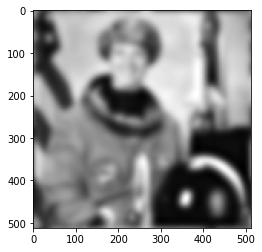

In [15]:
plt.imshow(deconvolved_img)